In [1]:
import seaborn as sns
import ptitprince as pt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
mutable = pd.read_csv('../MegaBike/MICalcs/mutable/mutable_emergence_criteria.csv').drop('Unnamed: 0', axis = 1)
mutable['rule type'] = 'mutable'

In [7]:
immutable = pd.read_csv('../MegaBike/MICalcs/immutable/immutable_emergence_criteria.csv').drop('Unnamed: 0', axis = 1)
immutable['rule type'] = 'immutable'

In [10]:
mutable.head()

,Psi,Gamma,Delta,rule type
0,0.000115,0.000032,-0.003244,mutable
1,0.000036,0.000055,-0.000275,mutable
2,0.000120,0.000045,-0.002084,mutable
3,0.000087,0.000055,-0.010332,mutable
4,0.000511,0.000024,-0.001370,mutable


In [11]:
immutable.head()

,Psi,Gamma,Delta,rule type
0,0.000462,0.000082,-0.012186,immutable
1,0.001519,0.000112,-0.000496,immutable
2,0.001008,0.000403,-0.008680,immutable
3,0.000132,0.000079,-0.010819,immutable
4,0.001037,0.000139,-0.053477,immutable


In [17]:
df_all = pd.merge(mutable, immutable, how="outer")

<Axes: xlabel='rule type', ylabel='Psi'>

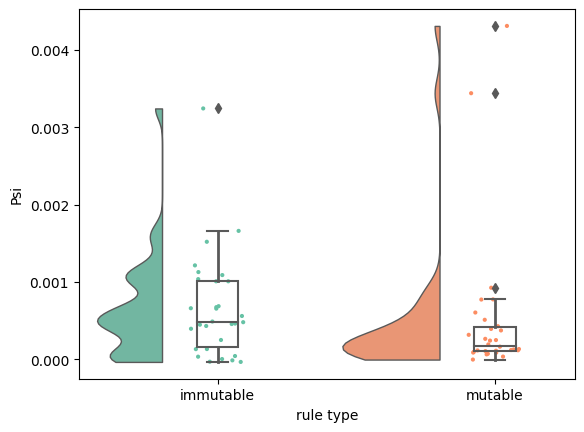

In [19]:
pt.RainCloud(data = df_all, x = 'rule type', y = 'Psi')

<Axes: xlabel='rule type', ylabel='Gamma'>

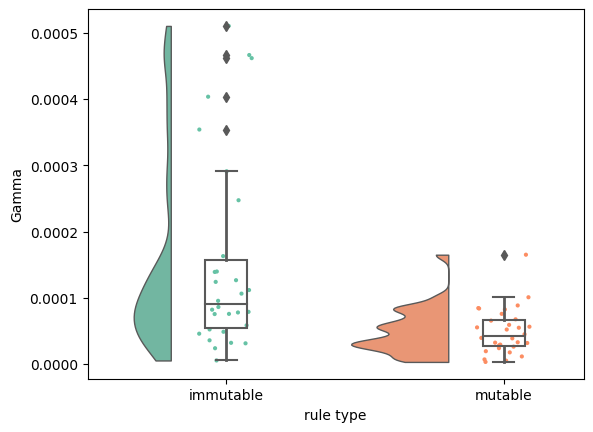

In [20]:
pt.RainCloud(data = df_all, x = 'rule type', y = 'Gamma')

<Axes: xlabel='rule type', ylabel='Delta'>

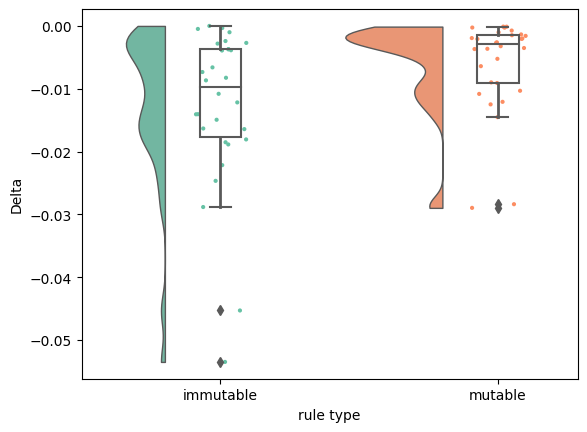

In [21]:
pt.RainCloud(data = df_all, x = 'rule type', y = 'Delta')

## Notes

- the higher $\Psi$ is, the more synergetic causal emergence in the system i.e. the leader makes some novel decisions based on the player's contributions, which are consistent in time, such that predicting the leader's behaviour makes predicting the system easier than predicting the invdividual
- $\Gamma = 0$ with $\Psi > 0$ means causal decoupling - make sense since the leader may choose something the part don't want! some runs gave it exactly at 0, more of them in the *immutable* case
- $\Delta > 0$ means downwards causation - we don't have this i.e. the leader does not influence the behaviour of indviduals, just the collective.

----

I would have _liked_ to see much higher $\Psi$ in the mutable games than immutable ones. Need more insight into how agents behave.